# Binary star models

ocelot includes a number of models, one of which is a binary star model. Let's look at what it contains, as an example!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ocelot.model.binaries import moe_distefano_17

In [2]:
masses, periods, periods_bounded, frequencies = (
    moe_distefano_17.mass,
    moe_distefano_17.mass_ratio_periods,
    moe_distefano_17.mass_ratio_periods_with_bounds,
    moe_distefano_17.period_frequencies,
)

In [3]:
moe_distefano_17._get_eccentricity_parameters(masses, np.full_like(masses, 2))

(array([0.1, 0.1, 0.1, 0.3, 0.6, 0.7, 0.7]),
 array([0.92631937, 0.92631937, 0.92631937, 0.92631937, 0.92631937,
        0.92631937, 0.92631937]))

In [4]:
moe_distefano_17._get_mass_ratio_distribution_parameters(masses, np.full_like(masses, 8))

(array([-1.1, -1.1, -1.1, -2. , -2. , -2. , -2. ]),
 array([ 0.3,  0.3,  0.3, -1. , -1.5, -1.5, -1.5]),
 array([0.015, 0.015, 0.015, 0.   , 0.   , 0.   , 0.   ]))

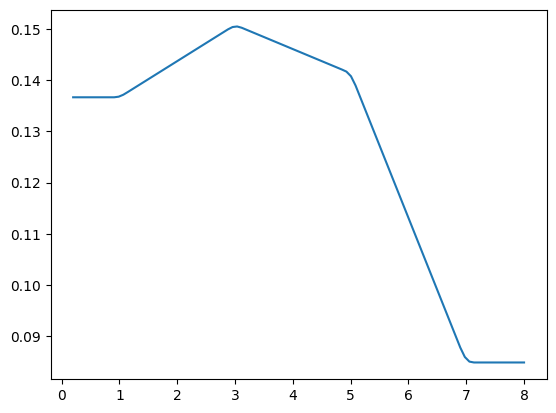

In [5]:
ppf, x = moe_distefano_17._get_period_percentile_point_function(np.asarray([16]))
plt.plot(x, np.gradient(ppf.flatten(), x))

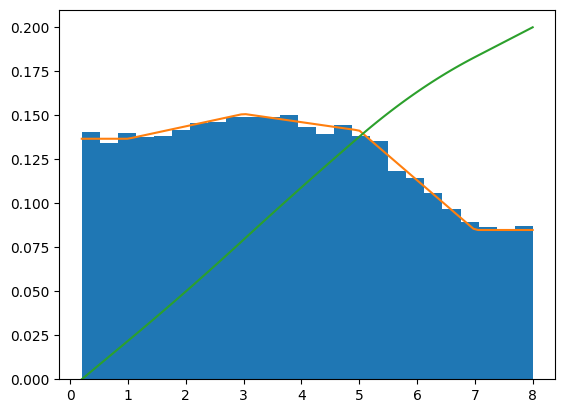

In [6]:
x, y = moe_distefano_17._get_period_pdf(np.atleast_1d(16.0))
ppf, y1 = moe_distefano_17._get_period_percentile_point_function(np.atleast_1d(16.0))
ppf = ppf.flatten()
pp = moe_distefano_17._sample_period(np.full(100000, 16))
_ = plt.hist(pp, bins=25, density=True)
plt.plot(x, y.flatten())
plt.plot(x, ppf / 5)
# plt.plot(x, np.gradient(ppf, x))

In [9]:
model = moe_distefano_17.MoeDiStefanoMultiplicityRelation()

In [16]:
masses = np.random.uniform(low=0.1, high=20, size=100000)

In [17]:
mass_ratio, period = model.random_binary(masses)

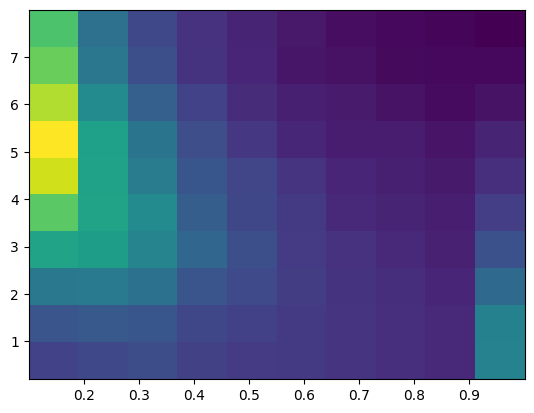

In [18]:
_ = plt.hist2d(mass_ratio, np.log10(period))